In [39]:
import pandas as pd 
import numpy as np 
import requests
from io import StringIO
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from typing import List

In [12]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [327]:

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}


df = pd.DataFrame()
for year in [2023,2022,2021,2020,2019]:
    url = f'http://www.tsa.gov/travel/passenger-volumes/{year}'

    r = requests.get(url, headers=header)

    dfs = pd.read_html(StringIO(r.text))

    df = pd.concat([df,dfs[0]])

In [328]:
df['year']= df['Date'].apply(lambda x : int(x.split('/')[2]) )



df['date'] = df['Date'].apply(pd.Timestamp)
df['day_month'] = df['date'].apply(lambda x : x.strftime('%m_%d'))
df['month']= df['date'].apply(lambda x : x.strftime('%m'))
df['month_str']= df['date'].apply(lambda x : x.strftime('%B'))

df['no_day']= df['date'].apply(lambda x : x.strftime('%d'))

display(df)

df_2 = pd.pivot_table(df, values='Numbers', index=['day_month'],
                       columns=['year'], 
                      aggfunc="sum")

df_2 = df_2.reset_index()

,Date,Numbers,year,date,day_month,month,month_str,no_day
0,1/1/2023,2046950,2023,2023-01-01,01_01,01,January,01
1,1/2/2023,2368194,2023,2023-01-02,01_02,01,January,02
2,1/3/2023,2212528,2023,2023-01-03,01_03,01,January,03
3,1/4/2023,1985965,2023,2023-01-04,01_04,01,January,04
4,1/5/2023,2031976,2023,2023-01-05,01_05,01,January,05
...,...,...,...,...,...,...,...,...
360,12/27/2019,2654247,2019,2019-12-27,12_27,12,December,27
361,12/28/2019,2540383,2019,2019-12-28,12_28,12,December,28
362,12/29/2019,2647034,2019,2019-12-29,12_29,12,December,29
363,12/30/2019,2572305,2019,2019-12-30,12_30,12,December,30


In [329]:
def plot_yealy(data:pd.DataFrame,years:List):
    fig = make_subplots(rows=1, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.1,
                    subplot_titles=("",
                                   
                                   )
                   )
    df = data[['Numbers','year','month','month_str']].groupby(by=['month_str','month','year']).sum().reset_index().copy()
    df = pd.pivot_table(df, values='Numbers', index=['month','month_str'],
                       columns=['year'], 
                      aggfunc="sum")

    df = df.reset_index()
 
    for year,c in zip(years,['#9b59b6','#f1c40f','grey','blue','red']):
        x_val= df['month'].values
        y_val = df[year].values
        fig.add_trace(go.Bar(x=x_val, 
                                 y=y_val, 
                                 # mode='lines',     
                                 # line=dict(color=c, width=1.3),
                             name=f'volume-{year}'
                            ), row=1, col=1)
  
    fig.update_yaxes(title_text="Volumes", row=1, col=1)
    fig.update_layout(height=500, width=1500, title_text="Monthly checkpoint travel numbers", template="plotly_white")
    # fig.update_layout(barmode='stack')
    fig.update_xaxes(
            title_text='month', 
        # title_font_size=15,
            
        )
    fig.show()

    return 

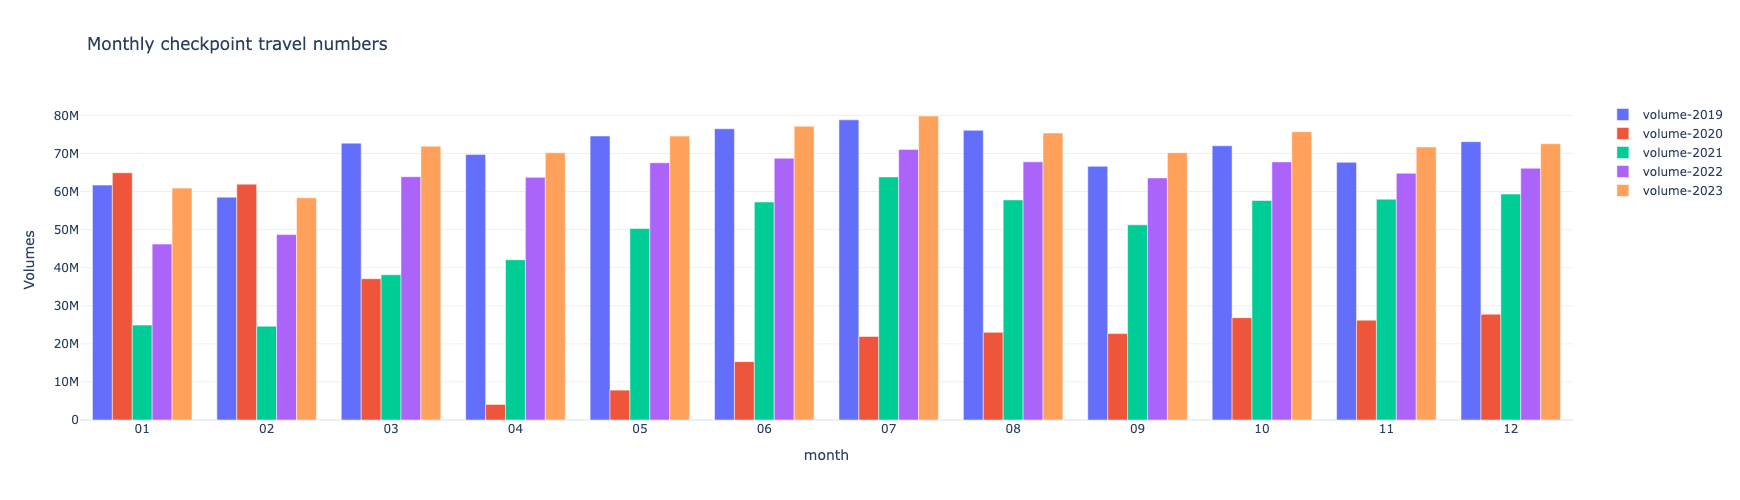

In [310]:
plot_yealy(df,years=[2019, 2020, 2021, 2022, 2023])

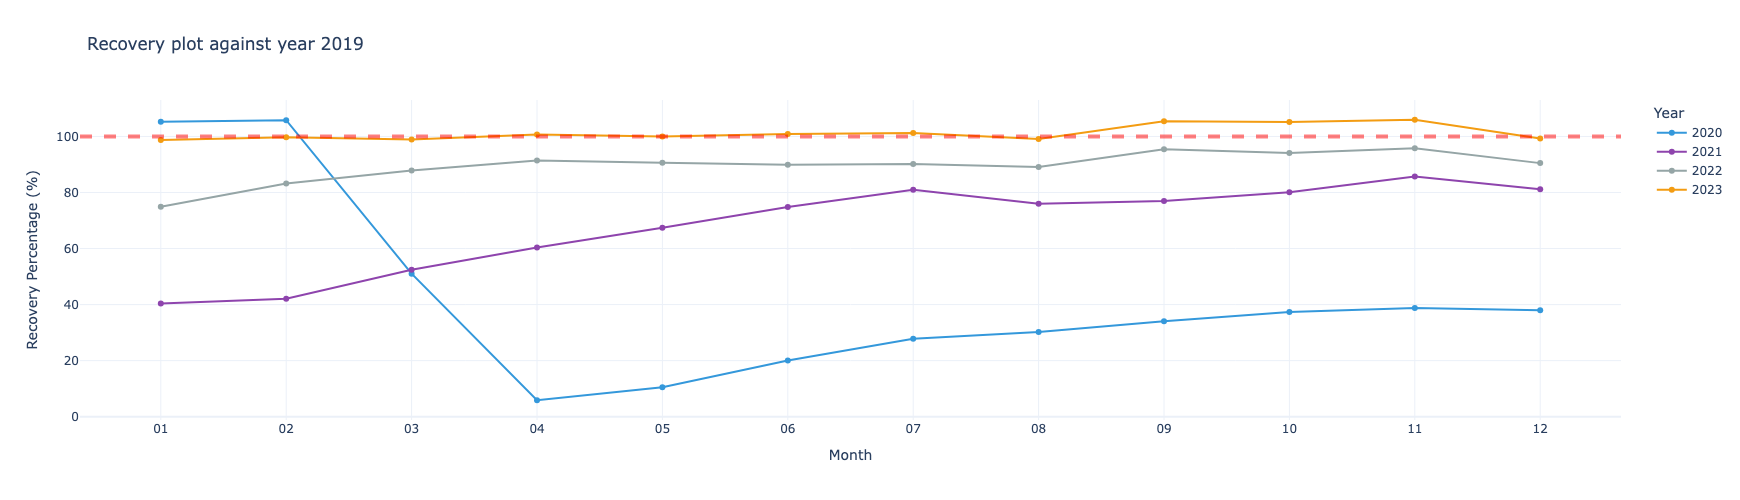

In [345]:
import pandas as pd
import plotly.express as px




# Pivot the table to have years as columns and months as rows
df_month = df[['Numbers','year','month','month_str']].groupby(by=['month_str','month','year']).sum().reset_index().copy()
# col = ['month']
pivot_df = df_month.pivot(index=['month','month_str'], columns='year', values='Numbers')

# Calculate the recovery percentage relative to 2019
recovery_df = pivot_df.div(pivot_df[2019], axis=0) * 100

# Reset index for plotting
recovery_df = recovery_df.reset_index()

colors = ['#3498db', '#8e44ad', '#95a5a6', '#f39c12'] 
years = [2020, 2021, 2022, 2023]
recovery_melted = recovery_df.melt(id_vars='month', value_vars=years, var_name='Year', value_name='Recovery_Percentage')

# Plot the recovery trends
fig = px.line(recovery_melted, x='month', y='Recovery_Percentage', 
              color='Year', 
                # line_shape='spline',  
              # line_opacity=1,  
              # marker={'size': 8},
              markers=True,
                color_discrete_sequence=colors,

              title='Recovery Trends of TSA Checkpoint Travel Volumes (Relative to 2019)', 
              labels={'Recovery_Percentage': 'Recovery Percentage (%)', 'month': 'Month'})

fig.update_layout(height=500, width=800, 
                  title_text="Recovery plot against year 2019", 
                  template="plotly_white")
fig.add_hline(y=100, line_color="red", line_width=4, line_dash="dash",opacity=0.5)

fig.show()


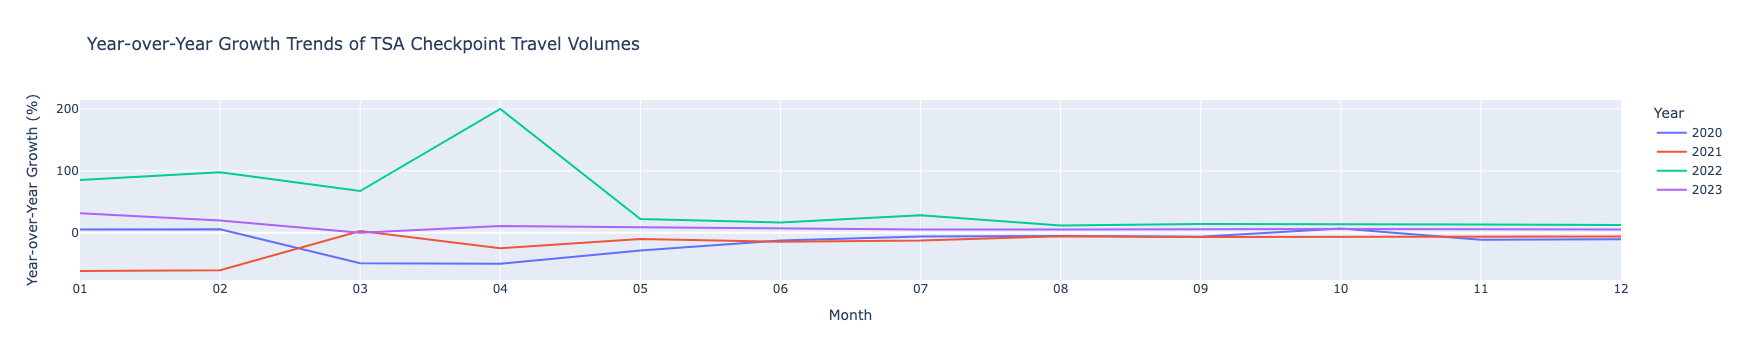

In [322]:
import pandas as pd
import plotly.express as px

# Sample data with monthly numbers for multiple years
data = {
    'month': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'] * 5,
    'year': [2019]*12 + [2020]*12 + [2021]*12 + [2022]*12 + [2023]*12,
    'Numbers': [
        61694899, 58535547, 72714771, 40000899, 70000123, 80000321, 85000456, 95000567, 80000000, 70000789, 90000890, 95000901,
        64932623, 61939822, 37106164, 20000000, 50000000, 70000000, 80000000, 90000000, 75000000, 75000000, 80000000, 85000000,
        24923269, 24633449, 38144734, 15000000, 45000000, 60000000, 70000000, 85000000, 70000000, 70000000, 75000000, 80000000,
        46196098, 48709041, 63906622, 45000000, 55000000, 70000000, 90000000, 95000000, 80000000, 80000000, 85000000, 90000000,
        60906882, 58361130, 63906622, 50000000, 60000000, 75000000, 95000000, 100000000, 85000000, 85000000, 90000000, 95000000
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Pivot the table to have years as columns and months as rows
pivot_df = df.pivot(index='month', columns='year', values='Numbers')

# Calculate the year-over-year growth
yoy_growth = pivot_df.pct_change(axis=1) * 100

# Reset index for plotting
yoy_growth = yoy_growth.reset_index()

# Melt the DataFrame for easier plotting
yoy_growth_melted = yoy_growth.melt(id_vars='month', value_vars=[2020, 2021, 2022, 2023], var_name='Year', value_name='YoY_Growth')

# Plot the year-over-year growth trends
fig = px.line(yoy_growth_melted, x='month', y='YoY_Growth', color='Year', 
              title='Year-over-Year Growth Trends of TSA Checkpoint Travel Volumes', 
              labels={'YoY_Growth': 'Year-over-Year Growth (%)', 'month': 'Month'})

fig.show()


In [325]:
 pivot_df

year,2019,2020,2021,2022,2023
month,,,,,
01,61694899,64932623,24923269,46196098,60906882
02,58535547,61939822,24633449,48709041,58361130
03,72714771,37106164,38144734,63906622,63906622
04,40000899,20000000,15000000,45000000,50000000
05,70000123,50000000,45000000,55000000,60000000
06,80000321,70000000,60000000,70000000,75000000
07,85000456,80000000,70000000,90000000,95000000
08,95000567,90000000,85000000,95000000,100000000
09,80000000,75000000,70000000,80000000,85000000


In [323]:
yoy_growth


year,month,2019,2020,2021,2022,2023
0,01,NaN,5.247961,-61.616722,85.353286,31.844213
1,02,NaN,5.815740,-60.230029,97.735368,19.815806
2,03,NaN,-48.970253,2.798915,67.537207,0.000000
3,04,NaN,-50.001124,-25.000000,200.000000,11.111111
4,05,NaN,-28.571554,-10.000000,22.222222,9.090909
5,06,NaN,-12.500351,-14.285714,16.666667,7.142857
6,07,NaN,-5.882858,-12.500000,28.571429,5.555556
7,08,NaN,-5.263723,-5.555556,11.764706,5.263158
8,09,NaN,-6.250000,-6.666667,14.285714,6.250000
9,10,NaN,7.141650,-6.666667,14.285714,6.250000


   month  year   Numbers  Load_Factor  YoY_Growth
0     01  2022  30000000         0.75         NaN
1     02  2022  35000000         0.78         NaN
2     03  2022  40000000         0.80         NaN
3     04  2022  45000000         0.82         NaN
4     05  2022  50000000         0.85         NaN
5     06  2022  55000000         0.87         NaN
6     07  2022  60000000         0.90         NaN
7     08  2022  65000000         0.92         NaN
8     09  2022  70000000         0.93         NaN
9     10  2022  75000000         0.95         NaN
10    11  2022  80000000         0.96         NaN
11    12  2022  85000000         0.97         NaN


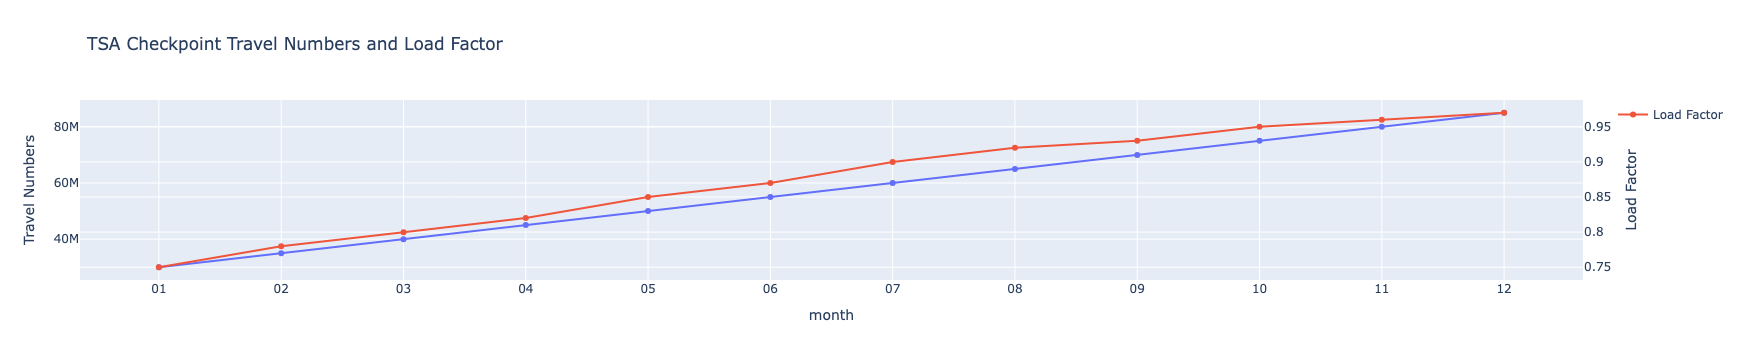

In [318]:
import pandas as pd

# Sample data structure for demonstration

# Create DataFrame


# Calculate YoY Growth (assuming we have 2021 data for comparison)
df['YoY_Growth'] = df['Numbers'].pct_change(periods=12) * 100  # Percentage change from previous year

# Display DataFrame
print(df)

# Example visualization using Plotly (not run here)
import plotly.express as px

# Visualize Load Factor and Numbers on secondary y-axis
fig = px.line(df, x='month', y='Numbers', title='TSA Checkpoint Travel Numbers and Load Factor',
              labels={'Numbers': 'Travel Numbers'}, markers=True)
fig.add_scatter(x=df['month'], y=df['Load_Factor'], mode='lines+markers', name='Load Factor', yaxis='y2')

# Update layout for secondary y-axis
fig.update_layout(
    yaxis2=dict(
        title='Load Factor',
        overlaying='y',
        side='right'
    )
)

fig.show()


tmp = df[['Numbers','year','month','month_str']].groupby(by=['month_str','month','year']).sum().reset_index()

tmp['yoy'] = tmp['Numbers'].diff()
tmp.head(10)

In [275]:
months = tmp['month'].unique()


def waterfall(data:pd.DataFrame,month_list):
    # Initialize the figure

    tmp = data.copy()
    fig = go.Figure()
    
    # Define colors for the waterfall steps
    colors = {
        'increase': '#2ecc71',
        'decrease': '#e74c3c',
        'total': '#7F7F7F'
    }
    
    # Create subplots
    fig = make_subplots(
                        rows=1, 
                        cols=4, shared_yaxes=True, 
                        shared_xaxes=False, 
                        vertical_spacing=0.1,
                        # subplot_titles=("",
                    
                       )
    # Add waterfall bars for each month
    for month,column in zip(month_list,range(1,5)):
        month_data = tmp[tmp['month'] == month]
        month_str = month_data['month_str'].iloc[0]
    
        year_labels = month_data['year'].astype(str).tolist()
        differences = month_data['yoy'].tolist()
        
        # Initial starting volume (starting from 2019)
        initial_volume = month_data.iloc[0]['Numbers']
        
        fig.add_trace(go.Waterfall(
            name=f"Month {month}",
            orientation="v",
            measure=["absolute"] + ["relative"] * (len(year_labels) - 1),
            x=year_labels,
            y=[initial_volume] + differences[1:],  # include initial value followed by differences
            base=0,
            textposition="outside",
            texttemplate="%{y:.3s}",
            decreasing={"marker":{"color": colors['decrease']}},
            increasing={"marker":{"color": colors['increase']}},
            totals={"marker":{"color": colors['total']}}
        )
            ,row=1,col=column ),
        fig.update_xaxes(
            title_text=month_str, title_font_size=15,
            row=1,col=column,
            
        )
    # Update layout
    fig.update_layout(
        # title=f"Year-over-Year monthly growth",
        yaxis_title="passengers volume",
        waterfallgap=0.1,
        height=800,
        width=2000,
        font_size=15,
        template="plotly_white",
        showlegend=False,
    )
    fig.update_yaxes(
            range=[0,85e6],  # sets the range of xaxis
        )
    fig.update_traces(textfont_size=15)

    # Show the plot
    fig.show()

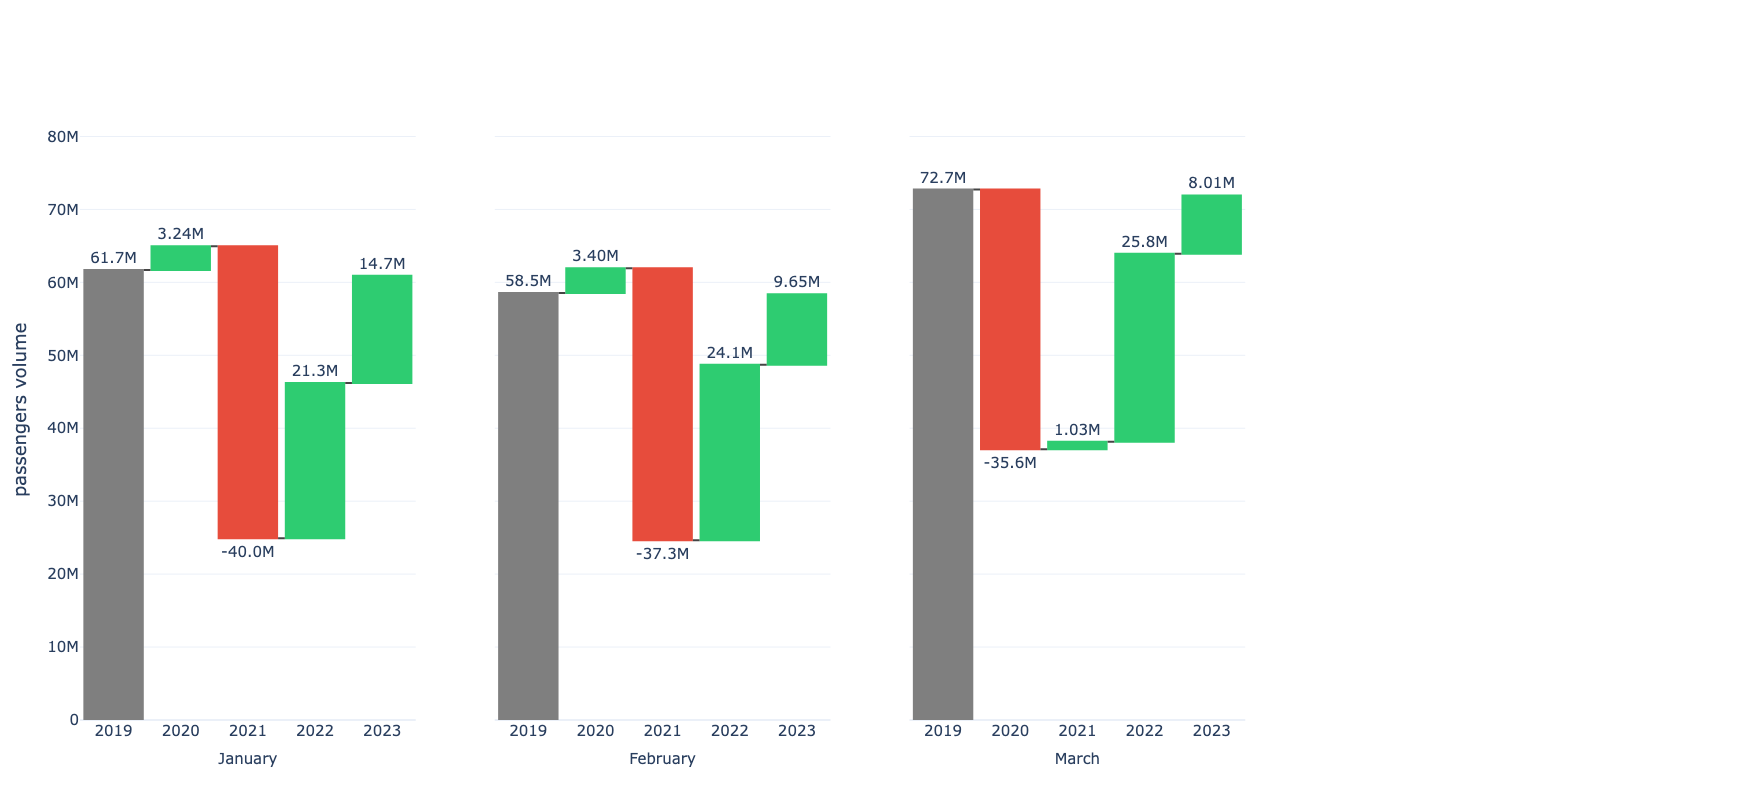

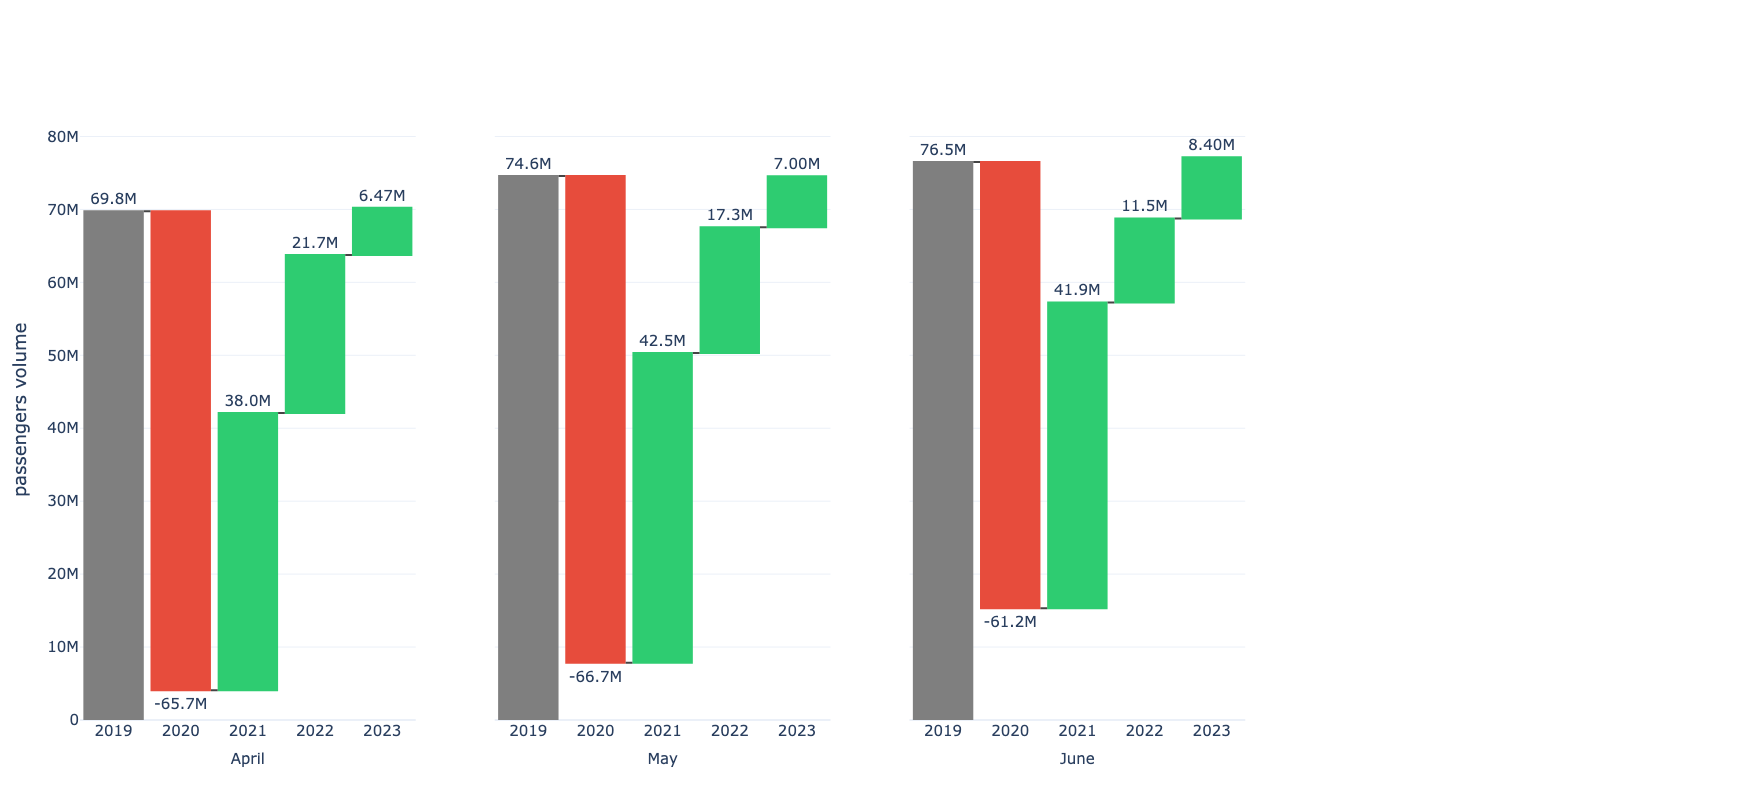

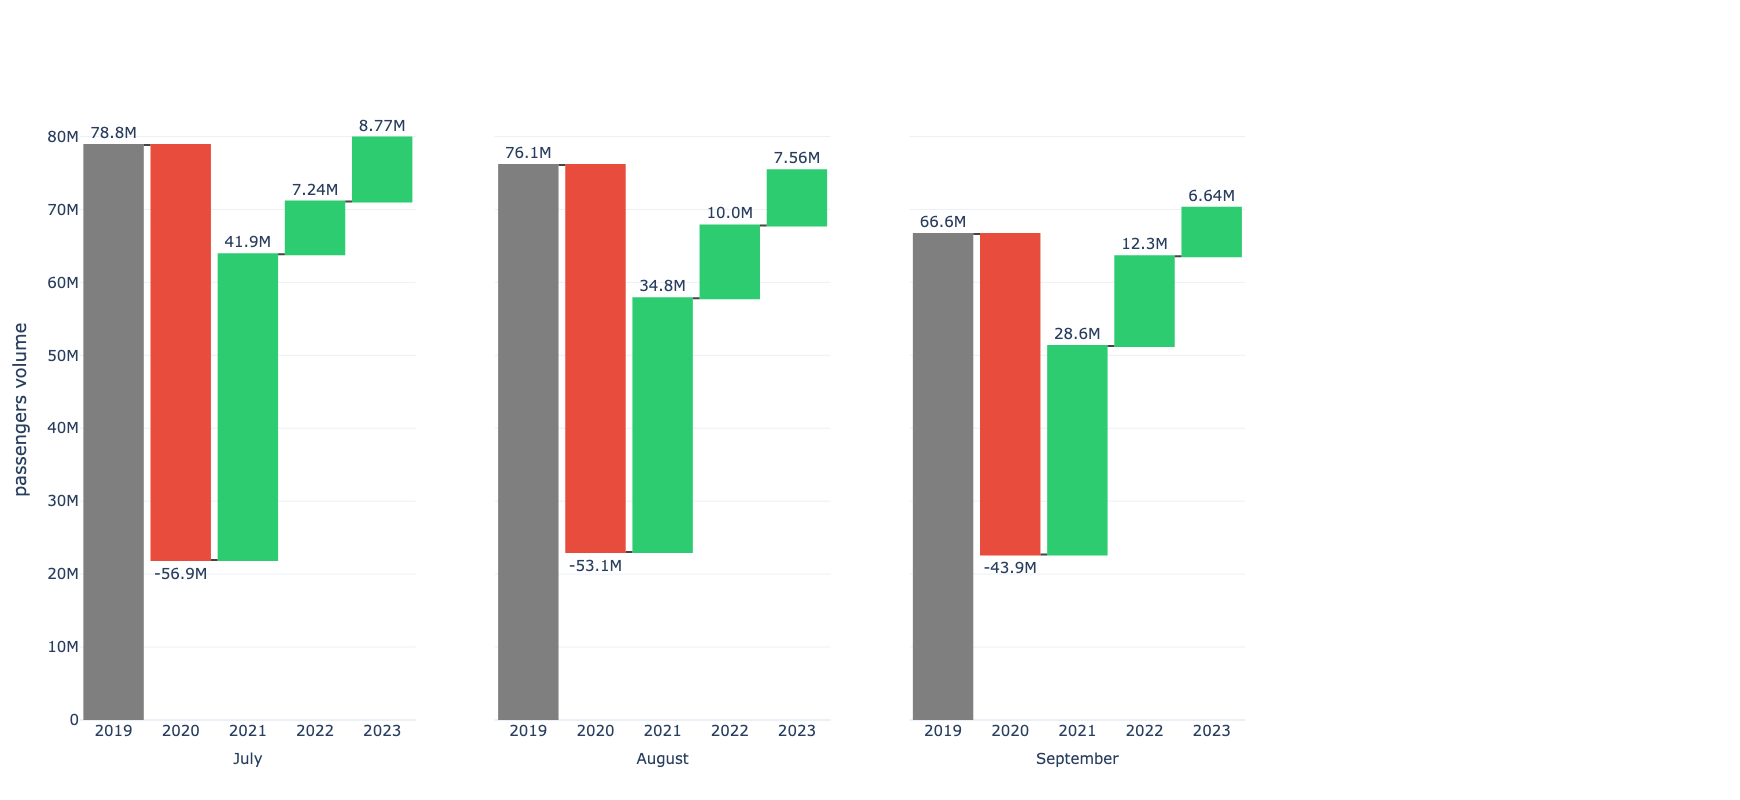

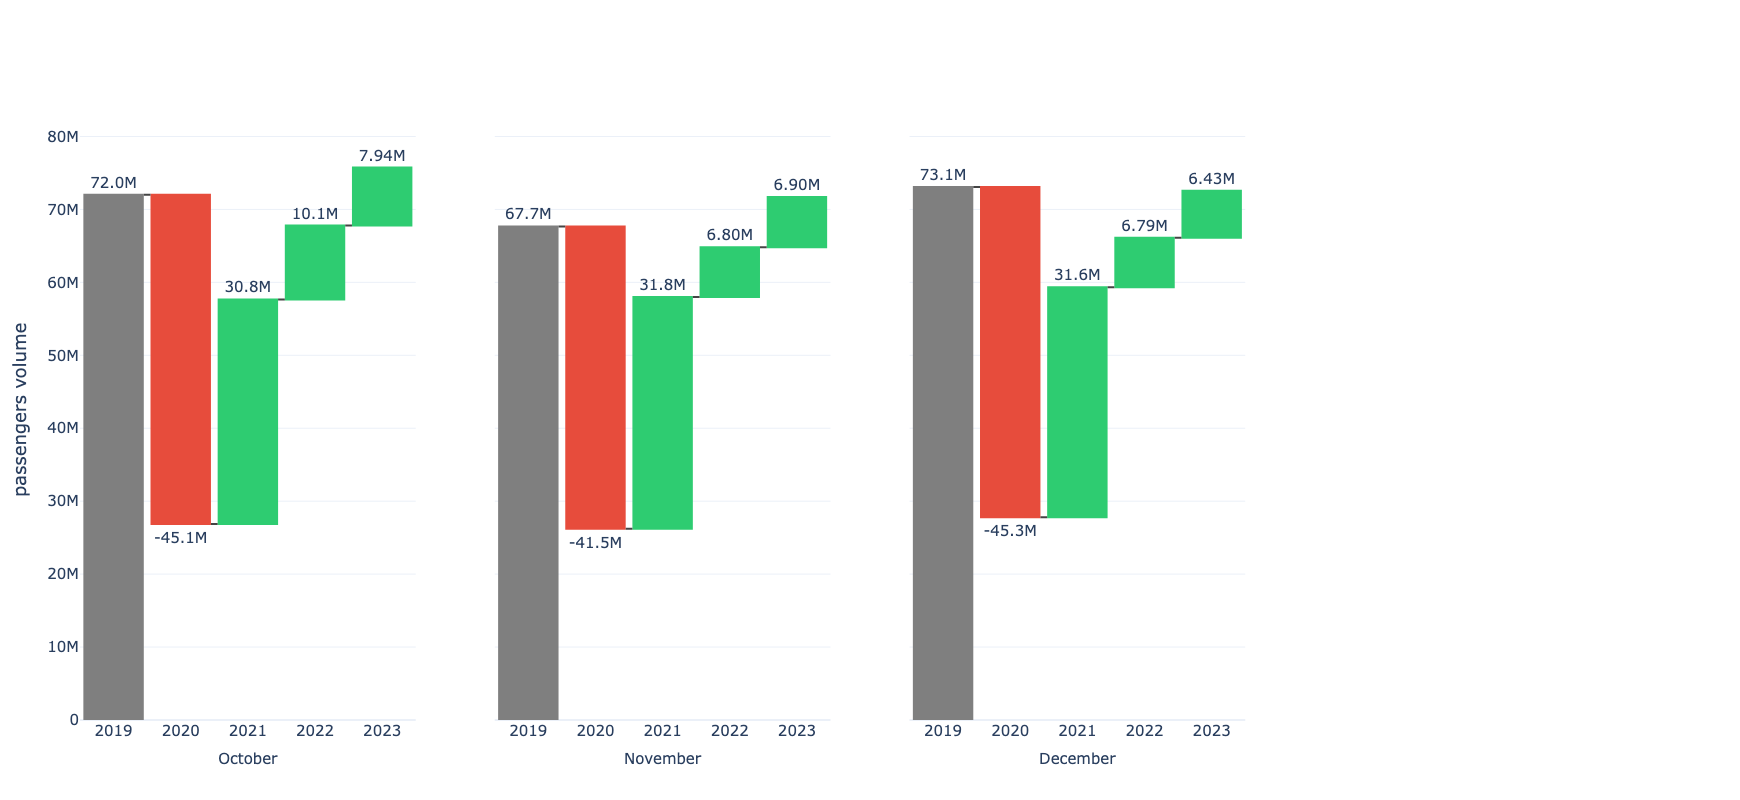

In [276]:
month_list = (['01','02','03'],['04','05','06'],['07','08','09'],['10','11','12'])
for k in month_list:
    waterfall(tmp,k)

# 